#### Data Mining Project
## Predict Housing Price
## Samaneh Marouzi

This dataset contains house sale prices for King County, which includes Seattle. 
It includes homes sold between May 2014 and May 2015

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk

In [2]:
df=pd.read_csv("kc_house_data.csv",index_col='id')

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
print(df.dtypes)
print(df.shape)

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object
(21613, 20)


In [5]:
df=df.drop(['date','zipcode'],axis=1)#drop two features

In [6]:
df['basement_present'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0) # Indicate whether there is a basement or not
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0) # 1 if the house has been renovated
df['age']=df['yr_built'].apply(lambda x: 2014-x if x > 0 else 0)#Indicate the age of the building

In [7]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,basement_present,renovated,age
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,47.5112,-122.257,1340,5650,0,0,59
6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,47.7210,-122.319,1690,7639,1,1,63
5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,47.7379,-122.233,2720,8062,0,0,81
2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,47.5208,-122.393,1360,5000,1,0,49
1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,47.6168,-122.045,1800,7503,0,0,27


In [8]:
print(df.shape)
df.describe(include="all")

(21613, 21)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,basement_present,renovated,age
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,...,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652,0.392680,0.042289,42.994864
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,...,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631,0.488358,0.201253,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000,-1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000,0.000000,0.000000,17.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000,0.000000,0.000000,39.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000,1.000000,0.000000,63.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.000000,114.000000


In [9]:
print(df.isnull().any())

price               False
bedrooms            False
bathrooms           False
sqft_living         False
sqft_lot            False
floors              False
waterfront          False
view                False
condition           False
grade               False
sqft_above          False
sqft_basement       False
yr_built            False
yr_renovated        False
lat                 False
long                False
sqft_living15       False
sqft_lot15          False
basement_present    False
renovated           False
age                 False
dtype: bool


In [10]:
y=df.price
x=df.drop('price',axis=1)

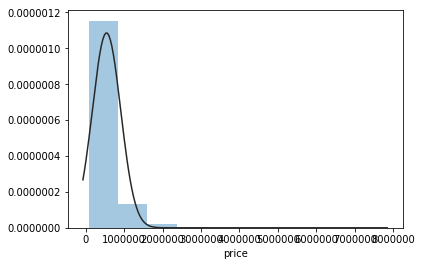

In [11]:
import matplotlib.pyplot as plt

import seaborn as sns

from scipy.stats import norm
from scipy import stats
#histogram and normal probability plot
sns.distplot(y, fit=norm, bins=10, kde=False)
plt.show()

In [12]:
#applying log transformation
y = np.log(y)

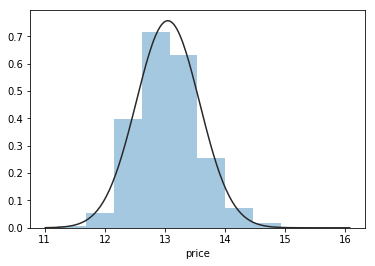

In [13]:
#transformed histogram and normal probability plot
sns.distplot(y, fit=norm,  bins=10, kde=False);
plt.show()

In [14]:
x['sqft_living'] = np.log(x['sqft_living'])


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train,y_test=train_test_split(x,y ,test_size=0.3,random_state = 0)%Split train test data, 70% and 30%

In [17]:
from sklearn import preprocessing

The preprocessing module further provides a utility class StandardScaler that implements the Transformer API to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. This class is hence suitable for use in the early steps of a sklearn.pipeline.Pipeline:

In [18]:
scaler= preprocessing.StandardScaler().fit(x_train)
scalery= preprocessing.StandardScaler().fit(y_train.values.reshape(-1,1))

In [19]:
x_train=pd.DataFrame(scaler.transform(x_train),columns=list(x_train.columns.values))

In [20]:
y_train=pd.DataFrame(scalery.transform(y_train.values.reshape(-1,1)),columns=["price"])

In [21]:
x_test=pd.DataFrame(scaler.transform(x_test),columns=list(x_test.columns.values))

In [22]:
y_test=pd.DataFrame(scalery.transform(y_test.values.reshape(-1,1)),columns=["price"])

In [23]:
c=x_train.shape[1]
print(c)

20


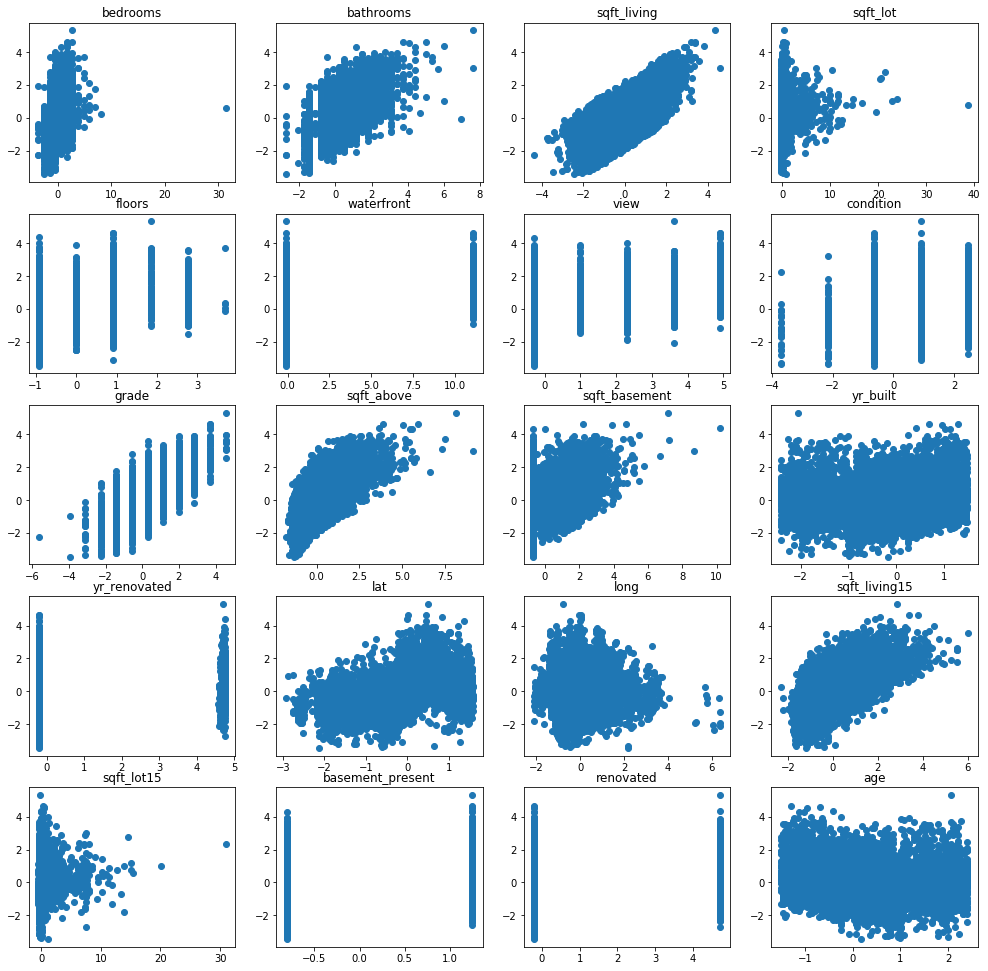

In [24]:
f, axarr = plt.subplots(5, 4,figsize=(17,17))

for i in range(5):
    for j in range(4):
        axarr[i, j].scatter(x_train.iloc[:,j+i*4], y_train)
        axarr[i, j].set_title(list(x_train.columns.values)[j+i*4])

f

In [25]:
absCor=abs(x_train.corrwith(y_train['price']))
absCor.sort_values(ascending=False)

grade               0.700612
sqft_living         0.673939
sqft_living15       0.617884
sqft_above          0.600244
bathrooms           0.549958
lat                 0.446489
view                0.350607
bedrooms            0.349680
sqft_basement       0.319694
floors              0.309431
basement_present    0.214939
waterfront          0.183876
yr_renovated        0.112886
renovated           0.112498
sqft_lot            0.104082
sqft_lot15          0.092413
age                 0.080164
yr_built            0.080164
long                0.050202
condition           0.046330
dtype: float64

In [26]:
t=14
x_train.drop(absCor.index.values[t:],axis=1,inplace=True)
x_test.drop(absCor.index.values[t:],axis=1,inplace=True)

In [27]:
featuresCor=x_train.corr()

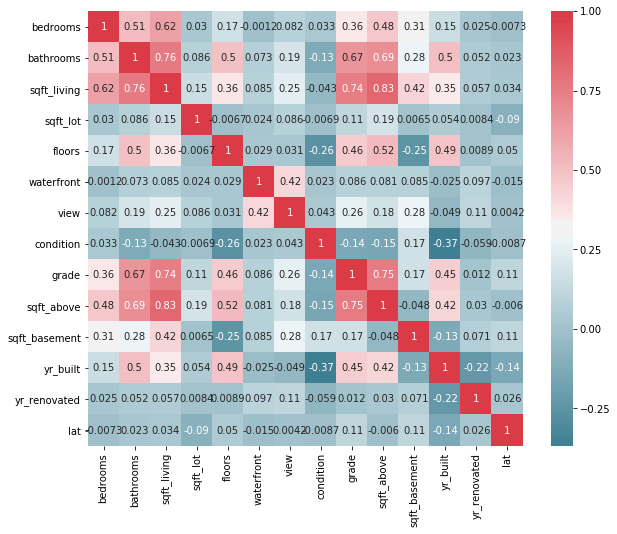

In [30]:
f, ax = plt.subplots(figsize=(10, 8))
corr = x_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
plt.show()

In [31]:
highCor=abs(corr.unstack()).sort_values(ascending=False)[t::2]

In [32]:
highCor.head()

sqft_living  sqft_above     0.833019
             bathrooms      0.760403
sqft_above   grade          0.754654
grade        sqft_living    0.744037
sqft_above   bathrooms      0.685287
dtype: float64

In [33]:
highCorrList=list(set(list(highCor[highCor>0.75].unstack().index)+list(highCor[highCor>0.75].unstack().columns.values)))

print(highCorrList)

['sqft_above', 'sqft_living', 'bathrooms', 'grade']


In [34]:
DropList=absCor[highCorrList][absCor[highCorrList]<0.65]
DropList=list(DropList.index)
print(DropList)

['sqft_above', 'bathrooms']


In [35]:
x_train.drop(DropList,axis=1,inplace=True)
x_test.drop(DropList,axis=1,inplace=True)

In [36]:
print(x_train.dtypes)
print(x_train.shape)

bedrooms         float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition        float64
grade            float64
sqft_basement    float64
yr_built         float64
yr_renovated     float64
lat              float64
dtype: object
(15129, 12)


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
# Create linear regression object
regr = LinearRegression()
# Train the model with training sets
regr.fit(x_train, y_train)
# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The intercept and coefficients, mean-squared error, R-squared score
print(' Intercept & Coefficients: \n', regr.intercept_, regr.coef_)
print("Mean squared error (training): %.2f" % mean_squared_error(y_train, regr.predict(x_train)))
print("Mean squared error (testing): %.2f" % mean_squared_error(y_test, y_pred))
print('R-square score (training): %.2f' % regr.score(x_train, y_train))
print('R-square score (testing): %.2f' % r2_score(y_test, y_pred))

 Intercept & Coefficients: 
 [ -1.66637815e-14] [[-0.0213701   0.36570029  0.03473224  0.07084438  0.06812145  0.10336759
   0.07295713  0.41554317 -0.17579423  0.02413834  0.36252788]]
Mean squared error (training): 0.24
Mean squared error (testing): 0.23
R-square score (training): 0.76
R-square score (testing): 0.76


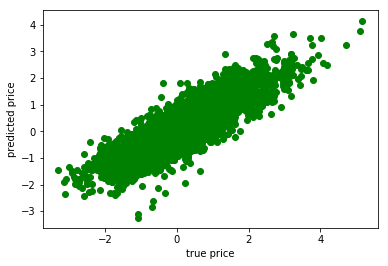

In [39]:
plt.scatter(y_test,y_pred,color='g')
plt.xlabel('true price')
plt.ylabel('predicted price')
plt.show()

In [40]:
import statsmodels.api as sm

x=sm.add_constant(x_train)
model = sm.OLS(y_train,x)
results = model.fit()
# Statsmodels gives R-like statistical output
print(results.summary())

C:\Users\mm\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     3953.
Date:                Tue, 28 Nov 2017   Prob (F-statistic):               0.00
Time:                        09:27:01   Log-Likelihood:                -10724.
No. Observations:               15129   AIC:                         2.147e+04
Df Residuals:                   15116   BIC:                         2.157e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.667e-14      0.004  -4.17e-12

In [41]:
DropList=list(results.pvalues[1:][results.pvalues>0.05].index)
print(DropList)

['sqft_basement']


In [42]:
x_train.drop(DropList,axis=1,inplace=True)
x_test.drop(DropList,axis=1,inplace=True)

In [43]:
x_train.columns

Index(['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'yr_built', 'yr_renovated', 'lat'],
      dtype='object')

In [45]:

X=x_train
y=y_train
y = np.ravel(y)
features=X.columns.values
results=[]

lr=LinearRegression()
for i in range(1,9):
    selector=RFE(lr,n_features_to_select=i, step=1)
    selector.fit(X,y)
    r2=selector.score(X, y)
    selected_features=features[selector.support_]
    msr=mean_squared_error(y, selector.predict(X))
    results.append([i,r2,msr,",".join(selected_features)])
    
results=pd.DataFrame(results,columns=['no_features','r2','mean square error','selected_features']) 
results

,no_features,r2,mean square error,selected_features
0,1,0.454194,0.545806,sqft_living
1,2,0.633876,0.366124,"sqft_living,lat"
2,3,0.694026,0.305974,"sqft_living,grade,lat"
3,4,0.729323,0.270677,"sqft_living,grade,yr_built,lat"
4,5,0.745455,0.254545,"sqft_living,view,grade,yr_built,lat"
5,6,0.749778,0.250222,"sqft_living,waterfront,view,grade,yr_built,lat"
6,7,0.752416,0.247584,"sqft_living,floors,waterfront,view,grade,yr_bu..."
7,8,0.756255,0.243745,"sqft_living,floors,waterfront,view,condition,g..."


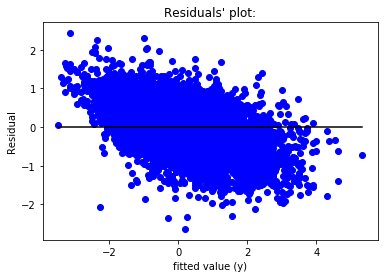

In [46]:
plt.scatter(y, selector.predict(X)-y,  color='blue')
plt.plot([y.min(),y.max()],[0,0],color='black')
plt.title("Residuals' plot:")
plt.xlabel('fitted value (y)')
plt.ylabel('Residual')
plt.show()

In [47]:
FinalFeatures=results.selected_features[2].split(',')
print(FinalFeatures)

['sqft_living', 'grade', 'lat']


In [48]:
x_train2=x_train[FinalFeatures]
x_test2=x_test[FinalFeatures]

In [49]:
# Create linear regression object
regr = LinearRegression()
# Train the model with training sets
regr.fit(x_train2, y_train)
# Make predictions using the testing set
y_pred = regr.predict(x_test2)

# The intercept and coefficients, mean-squared error, R-squared score
print(' Intercept & Coefficients: \n', regr.intercept_, regr.coef_)
print("Mean squared error (training): %.2f" % mean_squared_error(y_train, regr.predict(x_train2)))
print("Mean squared error (testing): %.2f" % mean_squared_error(y_test, y_pred))
print('R-square score (training): %.2f' % regr.score(x_train2, y_train))
print('R-square score (testing): %.2f' % r2_score(y_test, y_pred))

 Intercept & Coefficients: 
 [ -1.77750395e-14] [[ 0.38521309  0.37019204  0.39206952]]
Mean squared error (training): 0.31
Mean squared error (testing): 0.29
R-square score (training): 0.69
R-square score (testing): 0.70
